<a href="https://colab.research.google.com/github/TXH2020/Score_Prediction_System/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [3]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
raw_dataset = pd.read_csv(url)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [21]:
normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(dataset['Hours'])
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [23]:
%%time
history = model.fit(
    dataset['Hours'],
    dataset['Scores'],
    epochs=750,
    # Suppress logging.
    verbose=0
   )

CPU times: user 2.7 s, sys: 64.7 ms, total: 2.76 s
Wall time: 2.98 s


In [24]:
model.predict(pd.Series([2.0,3.5,10]))

1/1 [==============================] - 0s 49ms/step


array([[24.534],
       [38.05 ],
       [96.622]], dtype=float32)

1/1 [==============================] - 0s 21ms/step


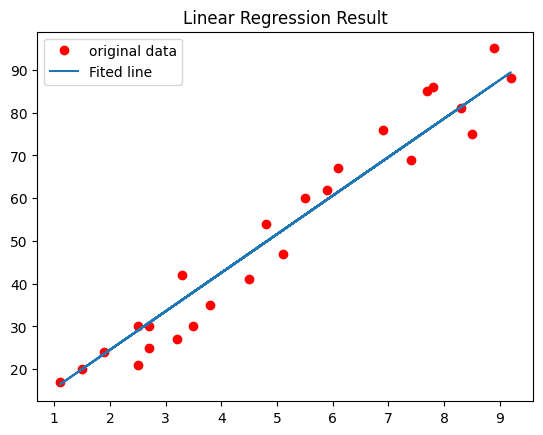

In [25]:
plt.plot(dataset['Hours'], dataset['Scores'], 'ro', label ='original data')
plt.plot(dataset['Hours'], model.predict(dataset['Hours']), label ='Fited line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()

In [26]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('m.tflite', 'wb') as f:
  f.write(tflite_model)